In [111]:
# Data loading from CSV stats file to which run_experiments.py wrote. For this cell, you only need to change
# the first 5 lines of code when carrying out experiments with a different configuration for the meta-features
# and number of seeds. Instructions are there in the comments of these 5 lines. For other cells, instructions at their beginnings.
import numpy as np
dir_name = '/home/anon/git/-MDP-Playground'
dir_name = '/home/rajanr/custom-gym-env/'
stats_file = dir_name + '/' + '160' #Name of file to which benchmark stats were written
num_values_per_hyperparam = (1, 1, 1, 5, 4, 10, 1, 3) # Dimension -3 must be set to the number of seeds,
# Dimension -4 must be set to the size of the grid for meta-feature number 2 that was varied
# (in this case 4 for sequence lengths), Dimension -5 must be set to the size of the grid for meta-feature
# number 1 that was varied (in this case 5 for delays).

datasets_info = np.loadtxt(stats_file + '.csv', dtype=object)
# print(datasets_info[0])
# print(datasets_info)
# print(type(datasets_info))
# print(datasets_info.shape)

col_vals = np.array(datasets_info[:, 2:], dtype=float) # ignores 1st column - algo. name
# print(col_vals)
#hack
final_rows_for_a_config = []

previous_i = 0
list_of_learning_curves = []
cols_to_take = 8
for i in range(col_vals.shape[0] - 1):

    if col_vals[i, -3] > col_vals[i + 1, -3]: #hack: 3rd last column is no. of timesteps for the current run
#         print(col_vals[i, 6])
        list_of_learning_curves.append(col_vals[previous_i:i+1, -cols_to_take:])
        previous_i = i + 1
        final_rows_for_a_config.append(i)
# print("i, previous_i:", i, previous_i)
final_rows_for_a_config.append(i + 1) # Always append the last row!
list_of_learning_curves.append(col_vals[previous_i:i + 2, -cols_to_take:])

# print("final_rows_for_a_config", final_rows_for_a_config)
# print("len(final_rows_for_a_config), len(list_of_learning_curves)",
#         len(final_rows_for_a_config), len(list_of_learning_curves))
# print(list_of_learning_curves[0])
# print(list_of_learning_curves[1])
# print(list_of_learning_curves[-1])
total_in_lcs = 0
for i in range(len(list_of_learning_curves)):
#     print(list_of_learning_curves[i].shape)
    total_in_lcs += list_of_learning_curves[i].shape[0]
# print("total_in_lcs", total_in_lcs)
final_vals = col_vals[final_rows_for_a_config]
# print("final_vals.shape", final_vals.shape)
metrics_ = final_vals[:, -3:] # last vals are timesteps_total, episode_reward_mean, episode_len_mean
metrics_reshaped = np.reshape(metrics_, num_values_per_hyperparam)
# print("metrics_reshaped.shape", metrics_reshaped.shape)
to_plot_ = np.squeeze(metrics_reshaped[:, :, :, 0, 0, :, :, 1])
# print(to_plot_)




In [112]:
# Preprocessing and loading for evaluation data written to CSV file!
stats_file_eval = stats_file + '_eval.csv'
eval_info = np.loadtxt(stats_file_eval, dtype=float)
# print(eval_info, eval_info.shape)

i = 0
hack_indices = []
for line in open(stats_file_eval):
    
    line=line.strip()
#    print(line)
    if line.startswith("#HACK"):
#         print(line, i)
        hack_indices.append(i - len(hack_indices)) # appends index of last eval in this training_iteration
    i += 1
    
# print(len(hack_indices), hack_indices)
hack_indices_10 = np.array(hack_indices) - 10
# print(hack_indices_10.shape, hack_indices_10)
# print(np.array(hack_indices[1:]) - np.array(hack_indices[:-1]))
# print("Min:", min(np.array(hack_indices[1:]) - np.array(hack_indices[:-1]))) # Some problem with Ray? Sometimes no. of eval episodes is less than 10.
final_10_evals = []
for i in range(len(hack_indices)):
    final_10_evals.append(eval_info[hack_indices_10[i]:hack_indices[i]])
#     print(final_10_evals[-1])

final_10_evals = np.array(final_10_evals) # has 2 columns: reward_this_episode and length_this_episode
# print(final_10_evals.shape, final_10_evals)

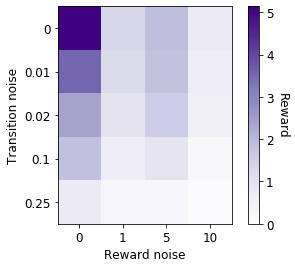

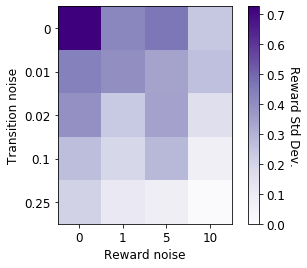

In [113]:
# Plots across 10 runs: Training: with std dev across the runs
# Change the labels and ticks below as per your experiment.
import matplotlib.pyplot as plt
y_axis_label = 'Delay'
x_axis_label = 'Sequence length'
y_tick_labels_ = [0, 0, 1, 2, 4, 8]
x_tick_labels_ = [0, 1, 2, 3, 4]

y_axis_label = 'Transition noise'
x_axis_label = 'Reward noise'
y_tick_labels_ = [0, 0, 0.01, 0.02, 0.10, 0.25, 0.5]
x_tick_labels_ = [0, 0, 1, 5, 10, 25, 100]

# y_axis_label = 'Delay'
# x_axis_label = 'Sequence Length'
# y_tick_labels_ = ["", "0"]
# x_tick_labels_ = ["", 2, "", 3, " ", 4]

# y_axis_label = ''
# x_axis_label = 'Reward Density'
# y_tick_labels_ = ["", ""]
# x_tick_labels_ = ["", 0.25, "", 0.5, " ", 0.75]
# # x_tick_labels_ = [0, 0.25, 0.5, 0.75] # only for poster, hacky way to get ticks!

# y_axis_label = 'n_step'
# x_axis_label = 'n_atoms'
# y_tick_labels_ = ["", 1,"", 2,"", 4,"", 8]
# x_tick_labels_ = [0, 5, 10, 20]

# y_axis_label = 'prioritized replay alpha'
# x_axis_label = 'prioritized replay beta'
# y_tick_labels_ = ["", 0.25, "", 0.5, "", 0.75, "", 1.0]
# x_tick_labels_ = [0, 0.4, 0.7, 1.0]

# y_axis_label = 'NN num layers'
# x_axis_label = 'NN layer widths'
# y_tick_labels_ = ["", 1, "", 2, "", 3, "", 4]
# x_tick_labels_ = [0, 8, 32, 128]
# x_tick_labels_ = [0, 128, 256, 512]

# y_axis_label = ''
# x_axis_label = 'NN neuron activation'
# y_tick_labels_ = ["", "", "", 2, "", 3, "", 4]
# x_tick_labels_ = ["", "tanh", "", "relu", "", "sigmoid"]

# y_axis_label = ''
# x_axis_label = 'Learning rate'
# y_tick_labels_ = ["", "", "", 2, "", 3, "", 4]
# x_tick_labels_ = ["", "1e-2", "1e-3", "1e-4", "1e-5", "1e-6", "sigmoid"]

# y_axis_label = 'DQN learning starts'
# x_axis_label = 'DQN target net update freq.'
# y_tick_labels_ = ["", 500, "", 1000, "", 2000, "", 4000]
# y_tick_labels_ = ["", 1000, "", 2000, "", 4000]
# # y_tick_labels_ = ["", 500, "1000", 2000, "4000", 8000, "", 4000]
# x_tick_labels_ = [0, 8, 80, 800]
# x_tick_labels_ = [0, 80, "", 800, "", 8000]

# y_axis_label = ''
# x_axis_label = 'Double DQN'
# y_tick_labels_ = ["", "", "", "",]
# x_tick_labels_ = [0, "False", "True"]


# y_axis_label = 'Learning rate'
# x_axis_label = 'Adam epsilon'
# y_tick_labels_ = ["", "1e-2", "1e-3", "1e-4", "1e-5", "1e-6"]
# x_tick_labels_ = ["", "1e-1", "1e-4", "1e-7", "1e-10", ""]
# x_tick_labels_ = ["", "1e-3", "1e-4", "1e-5", "1e-6", ""]


plt.rcParams.update({'font.size': 12}) # default 12, for poster: 30

mean_data_ = np.mean(metrics_reshaped[:, 0, 0, :, :, :, :, 1], axis=-2)
to_plot_ = np.squeeze(mean_data_)
# print(np.squeeze(metrics_reshaped[:, 0, 0, :, :, :, :, 0]),
#       metrics_reshaped[:, :, :, :, :, :, :, :].shape)
# print(to_plot_, to_plot_.shape)
plt.imshow(np.atleast_2d(to_plot_), cmap='Purples', interpolation='none', vmin=0, vmax=np.max(to_plot_))
plt.gca().set_xticklabels(x_tick_labels_)
plt.gca().set_yticklabels(y_tick_labels_)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15 # default 15, for poster: 25
cbar.set_label('Reward', rotation=270)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()
std_dev_ = np.std(metrics_reshaped[:, 0, 0, :, :, :, :, 1], axis=-2)
to_plot_ = np.squeeze(std_dev_)
# print(to_plot_, to_plot_.shape)
plt.imshow(np.atleast_2d(to_plot_), cmap='Purples', interpolation='none', vmin=0, vmax=np.max(to_plot_)) # 60 for DQN, 100 for A3C
plt.gca().set_xticklabels(x_tick_labels_)
plt.gca().set_yticklabels(y_tick_labels_)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15 # default 15, for poster: 30
cbar.set_label('Reward Std Dev.', rotation=270)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
# plt.tight_layout()
plt.show()






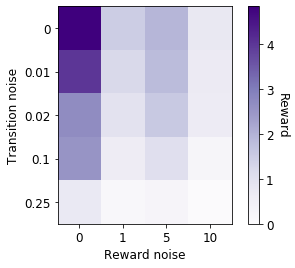

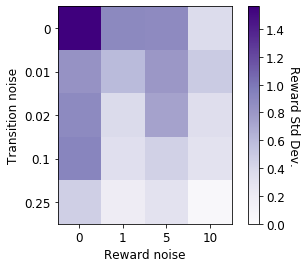

In [114]:
# Same as above but for eval metrics; Plots across 10 runs: with std dev across the runs


# final_vals = fin[final_rows_for_a_config]

# print('final_rows_for_a_config', final_rows_for_a_config)
# print("len(final_10_evals)", final_10_evals.shape, type(final_10_evals))
mean_data_eval = np.mean(final_10_evals, axis=1) # this is mean over last 10 eval episodes
# print(mean_data_eval.shape, len(final_rows_for_a_config))
final_eval_metrics_ = mean_data_eval[final_rows_for_a_config, -2:]
# print(final_eval_metrics_.shape)
num_values_per_hyperparam = list(num_values_per_hyperparam)
num_values_per_hyperparam[-1] = 2
final_eval_metrics_reshaped = np.reshape(final_eval_metrics_, num_values_per_hyperparam)
# print("final_eval_metrics_reshaped.shape", final_eval_metrics_reshaped.shape)
plt.rcParams.update({'font.size': 12})

mean_data_ = np.mean(final_eval_metrics_reshaped[:, 0, 0, :, :, :, :, 0], axis=-2)
to_plot_ = np.squeeze(mean_data_)
# print(np.squeeze(final_eval_metrics_reshaped[:, 0, 0, :, :, :, :, 0]),
#       final_eval_metrics_reshaped[:, :, :, :, :, :, :, :].shape)
# import matplotlib.pyplot as plt
plt.imshow(np.atleast_2d(to_plot_), cmap='Purples', interpolation='none', vmin=0, vmax=np.max(to_plot_))
plt.gca().set_xticklabels(x_tick_labels_)
plt.gca().set_yticklabels(y_tick_labels_)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('Reward', rotation=270)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()
std_dev_ = np.std(final_eval_metrics_reshaped[:, 0, 0, :, :, :, :, 0], axis=-2)
to_plot_ = np.squeeze(std_dev_)
# print(to_plot_, to_plot_.shape)
plt.imshow(np.atleast_2d(to_plot_), cmap='Purples', interpolation='none', vmin=0, vmax=np.max(to_plot_))
plt.gca().set_xticklabels(x_tick_labels_)
plt.gca().set_yticklabels(y_tick_labels_)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('Reward Std Dev.', rotation=270)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()






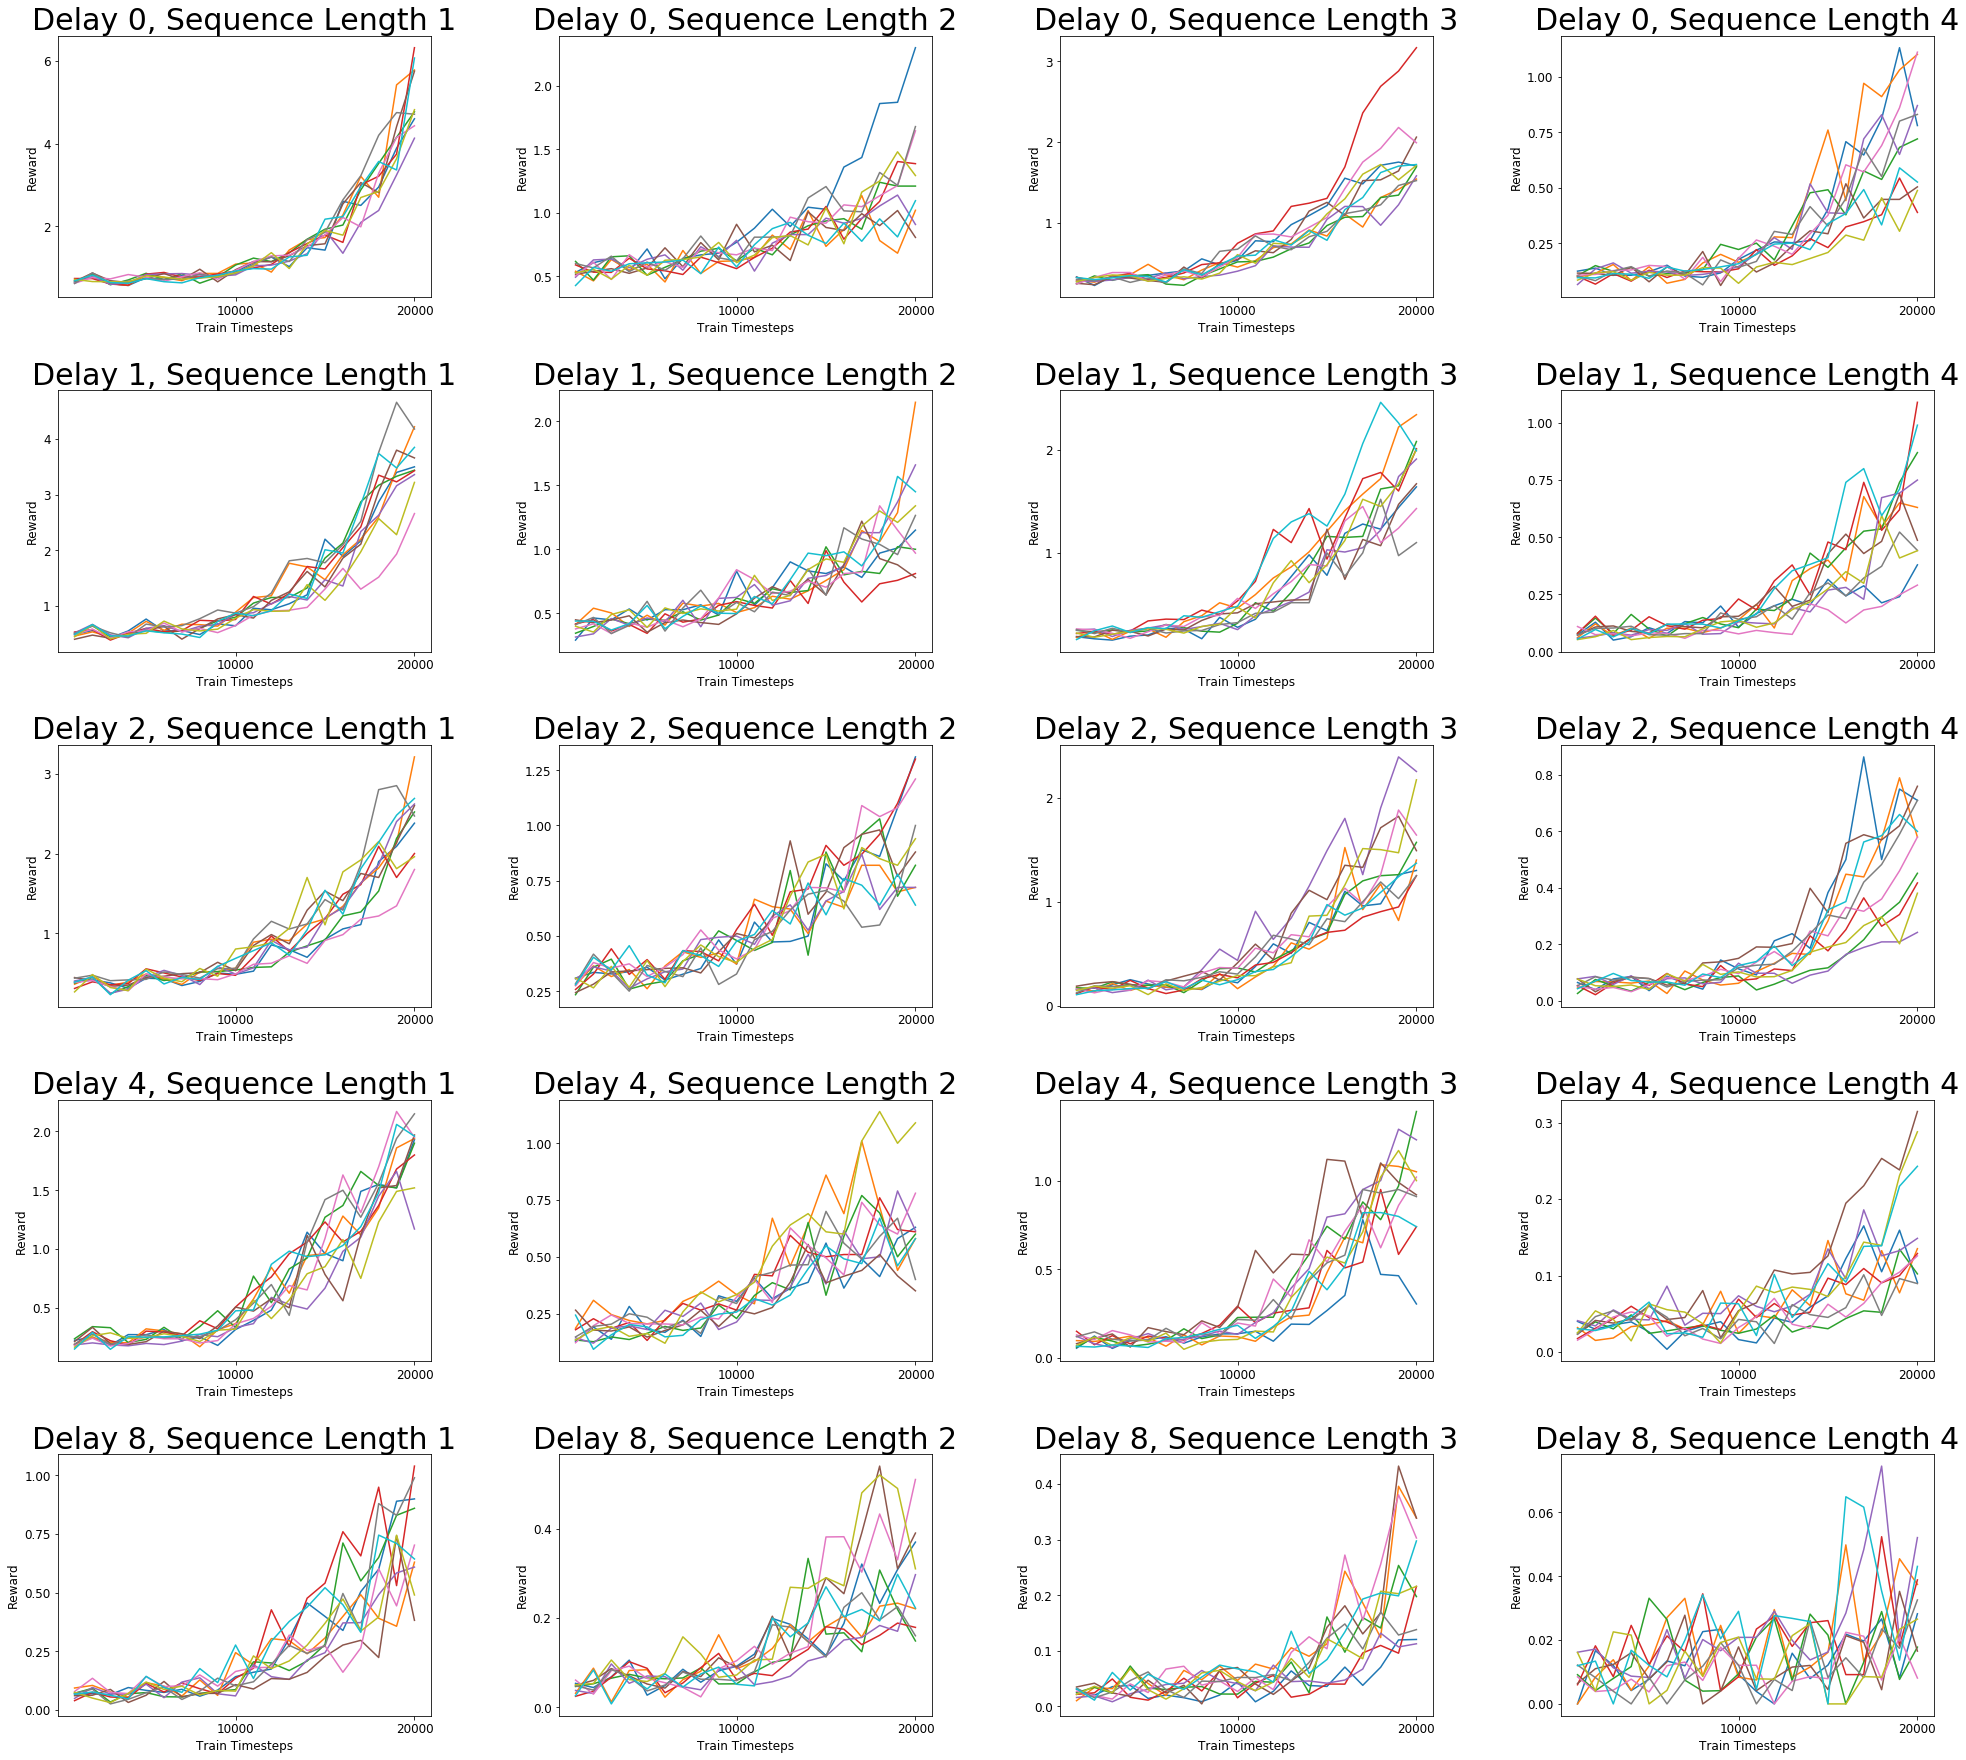

In [115]:
# Plot for train metrics: learning curves; with subplot
# Comment out unneeded labels in code lines 41-44 in this cell
nrows_ = num_values_per_hyperparam[-5]
ncols_ = num_values_per_hyperparam[-4]
nseeds_ = num_values_per_hyperparam[-3]
# 36x21 for better resolution but about 900kb file size, 24x14 for okay resolution and 550kb file size
fig, ax = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(7 * ncols_, 5 * nrows_))
ax = np.atleast_2d(ax)
# print(ax, type(ax), type(ax[0]))
#fig = plt.figure(figsize=(9*4, 7*3)) #
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
# print("color_cycle", color_cycle)
seq_lens = [2, 3, 4]
plt.rcParams.update({'font.size': 25}) # 25 for 36x21 fig, 16 for 24x14 fig.
# metrics_reshaped_squeezed = np.squeeze(metrics_reshaped)
# print(np.squeeze(metrics_reshaped).shape)
delays = [0] + [2**i for i in range(4)]
sequence_lengths = [1, 2, 3, 4]#i for i in range(1,4)]
transition_noises = [0, 0.01, 0.02, 0.10, 0.25]
reward_noises = [0, 1, 5, 10, 25] # Std dev. of normal dist. #, lambda a: a.normal(0, 0.1), lambda a: a.normal(0, 0.25), lambda a: a.normal(0, 0.5),]
# sequence_lengths = [2, 3, 4]#i for i in range(1,4)]
reward_densities = [0.25, 0.50, 0.75]
for i in range(len(final_rows_for_a_config)):
    i_index = i//(nseeds_ * ncols_) # = num_seeds * shape of more frequently changing hyperparam
    j_index = (i//nseeds_) % ncols_ #
    if i == 0:
        to_plot_ = col_vals[0:final_rows_for_a_config[i]+1,-2]
        to_plot_x = col_vals[0:final_rows_for_a_config[i]+1,-3]
    else:
        to_plot_ = col_vals[final_rows_for_a_config[i-1]+1:final_rows_for_a_config[i]+1,-2]
        to_plot_x = col_vals[final_rows_for_a_config[i-1]+1:final_rows_for_a_config[i]+1,-3]
#     if i % 10 == 0:
#         fig = plt.figure(figsize=(12, 7))
#     print(i//50, (i//10) % 5)
    ax[i_index][j_index].plot(to_plot_x, to_plot_, rasterized=False)#, label="Seq len" + str(seq_lens[i//10]))
    if i % nseeds_ == nseeds_ - 1: # 10 is num. of seeds
#         pass
#         print("Plot no.", i//10)
        ax[i_index][j_index].set_xlabel("Train Timesteps")
        ax[i_index][j_index].set_ylabel("Reward")
        ax[i_index][j_index].set_title('Delay ' + str(delays[i_index]) + ', Sequence Length ' + str(sequence_lengths[j_index]))
#         ax[i_index][j_index].set_title('P Noise ' + str(transition_noises[i_index]) + ', R Noise ' + str(reward_noises[j_index]))
#         ax[i_index][j_index].set_title('Sequence Length ' + str(seq_lens[j_index]))
#         ax[i_index][j_index].set_title('Reward Density ' + str(reward_densities[j_index]))

#         plt.legend(loc='upper left', prop={'size': 26})
fig.tight_layout()
# plt.suptitle("Training Learning Curves")
plt.show()
fig.savefig(stats_file.split('/')[-1] + '_train_learning_curves.pdf', dpi=300) # Generates high quality vector graphic PDF 125kb; dpi doesn't matter for this
# fig.savefig(stats_file.split('/')[-1] + '_train_learning_curves.png', dpi=30) # Generates okay quality rasterized PNG 250kb for 36x21 fig above

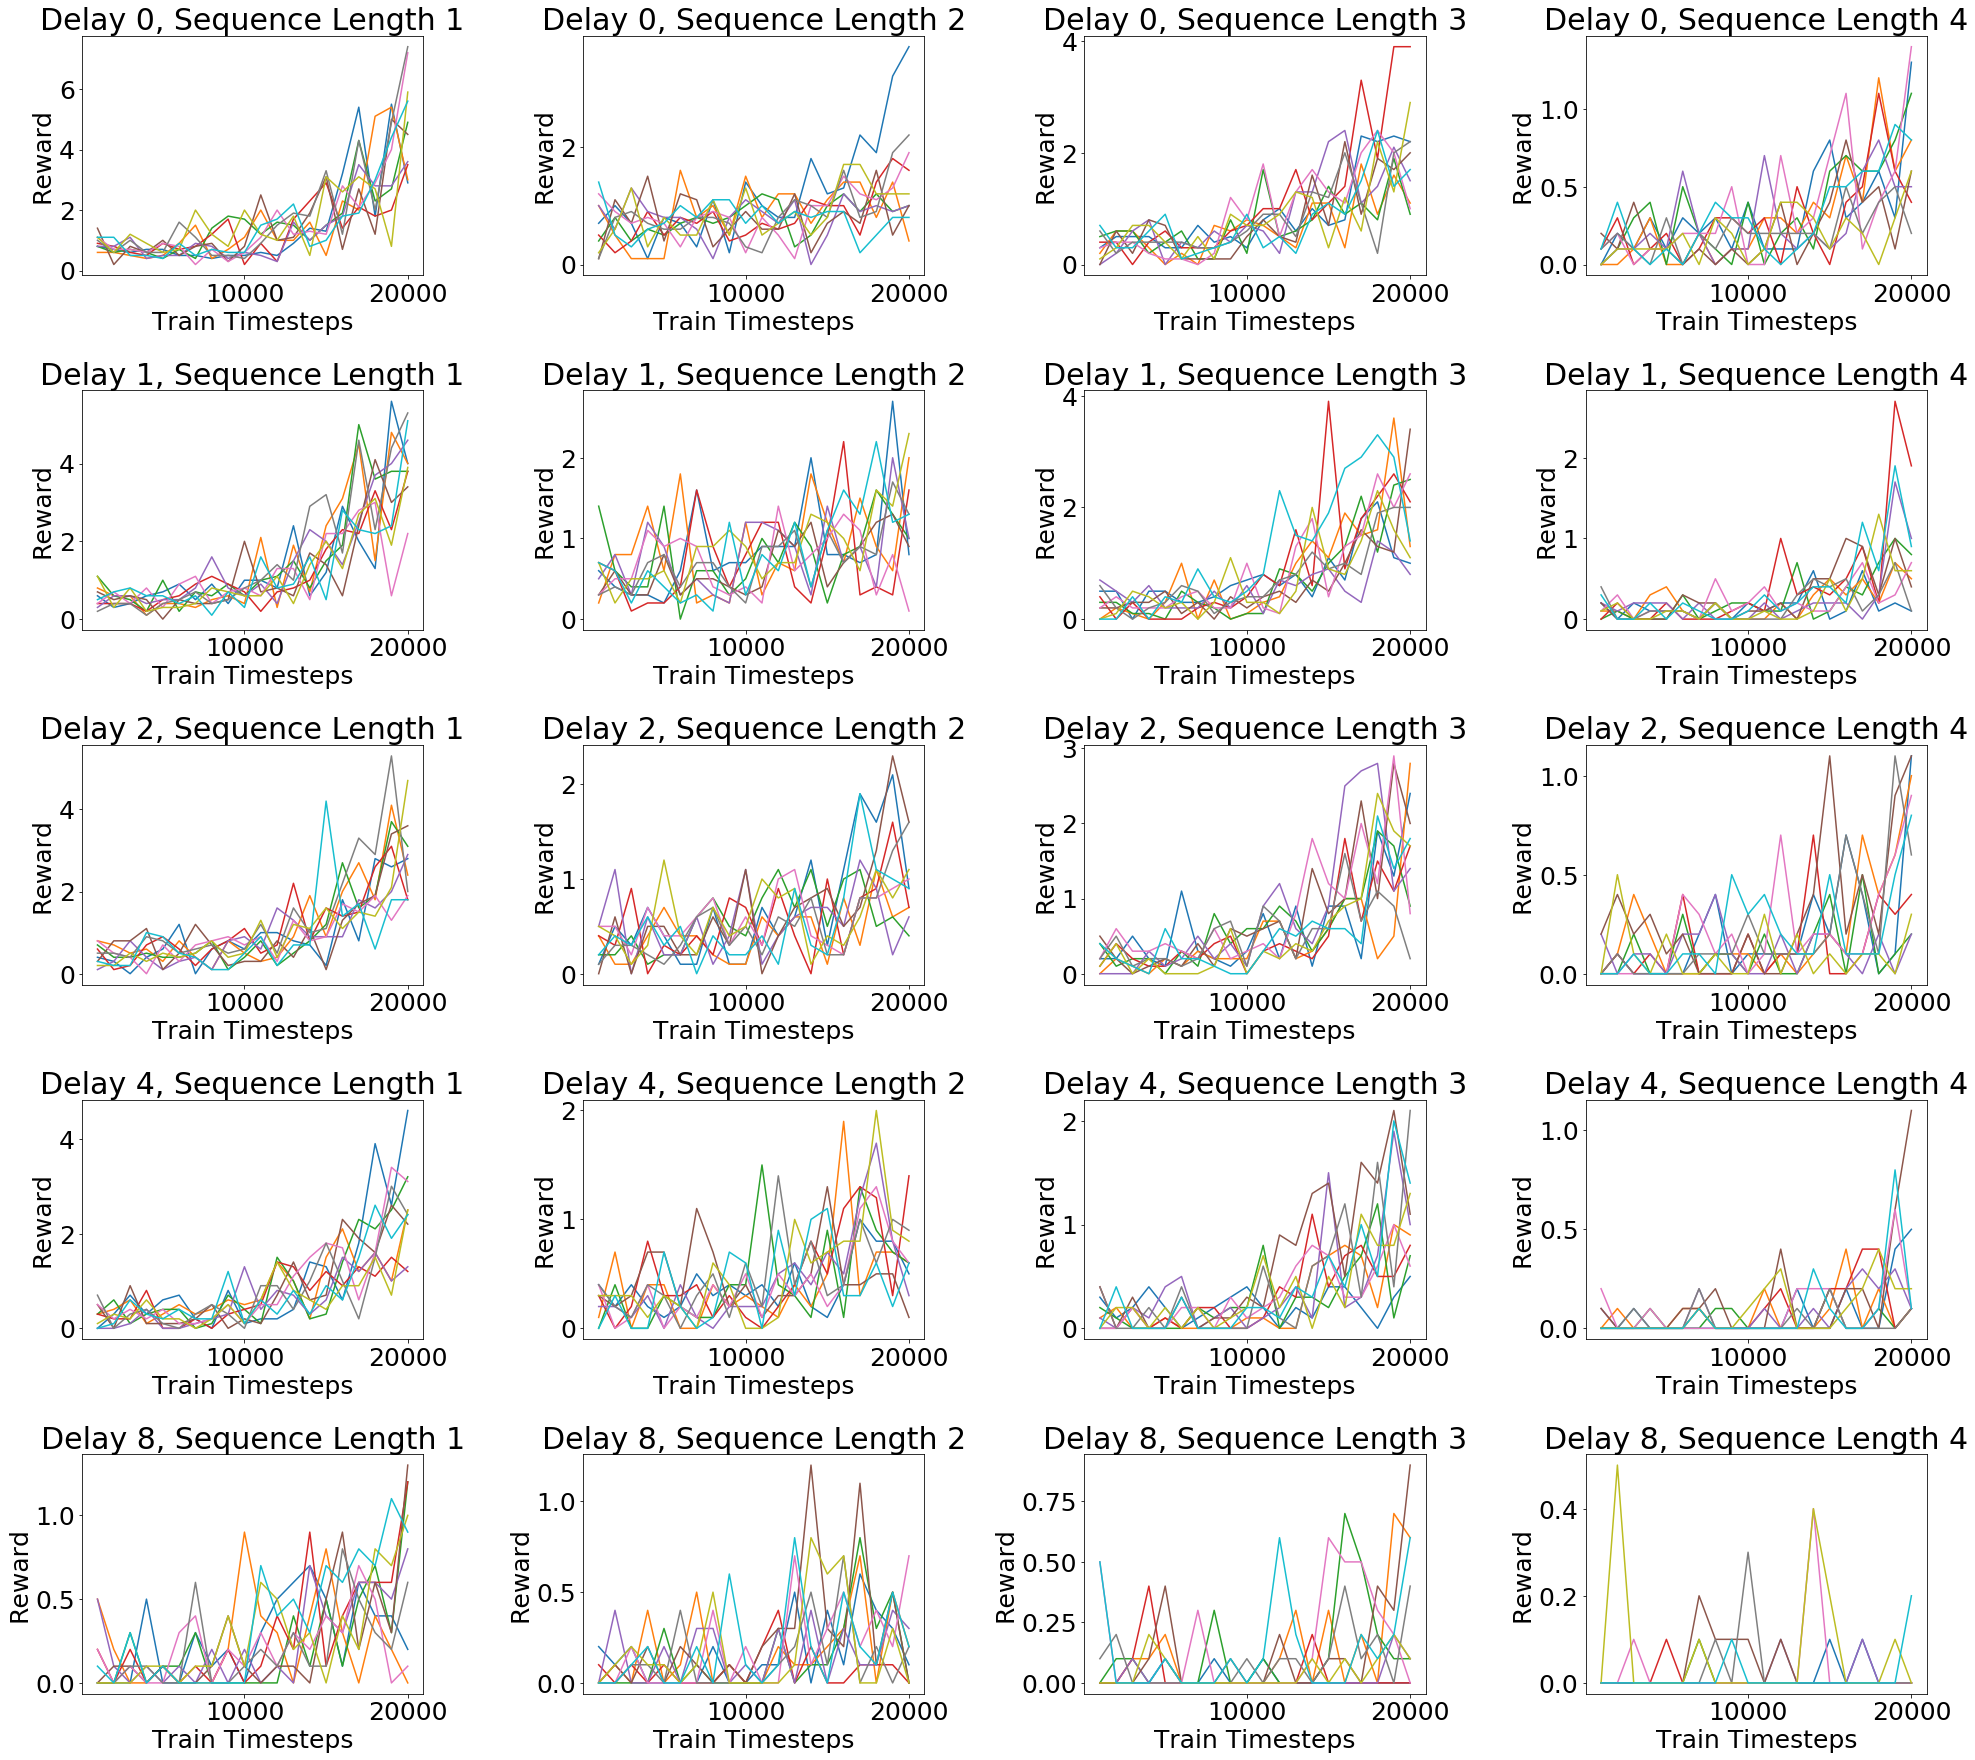

In [116]:
# Plot for eval metrics: learning curves; with subplots
# Comment out unneeded labels in code lines 37-40 in this cell
fig, ax = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=((7 * ncols_, 5 * nrows_))) # (36,21) plots for paper
ax = np.atleast_2d(ax)
#fig = plt.figure(figsize=(9*4, 7*3)) #
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
# print("color_cycle", color_cycle)
seq_lens = [2, 3, 4]
plt.rcParams.update({'font.size': 25})
# print(mean_data_eval.shape, col_vals.shape)
# metrics_reshaped_squeezed = np.squeeze(metrics_reshaped)
# print(np.squeeze(metrics_reshaped).shape)
delays = [0] + [2**i for i in range(4)]
sequence_lengths = [1, 2, 3, 4]#i for i in range(1,4)]
transition_noises = [0, 0.01, 0.02, 0.10, 0.25]
reward_noises = [0, 1, 5, 10, 25] # Std dev. of normal dist. #, lambda a: a.normal(0, 0.1), lambda a: a.normal(0, 0.25), lambda a: a.normal(0, 0.5),]
# sequence_lengths = [2, 3, 4]#i for i in range(1,4)]
reward_densities = [0.25, 0.50, 0.75]
for i in range(len(final_rows_for_a_config)):
    i_index = i//(nseeds_ * ncols_) # = num_seeds * shape of more frequently changing hyperparam
    j_index = (i//nseeds_) % ncols_ #
    if i == 0:
        to_plot_ = mean_data_eval[0:final_rows_for_a_config[i]+1,:]
        to_plot_x = col_vals[0:final_rows_for_a_config[i]+1,-3]
    else:
        to_plot_ = mean_data_eval[final_rows_for_a_config[i-1]+1:final_rows_for_a_config[i]+1,:]
        to_plot_x = col_vals[final_rows_for_a_config[i-1]+1:final_rows_for_a_config[i]+1,-3]
#     if i % 10 == 0:
#         fig = plt.figure(figsize=(12, 7))
#     plt.plot(to_plot_x, to_plot_[:, 0])#, label="Seq len" + str(seq_lens[i//10]))
    ax[i_index][j_index].plot(to_plot_x, to_plot_[:, 0])#, label="Seq len" + str(seq_lens[i//10]))
    if i % nseeds_ == nseeds_ - 1: # 10 is num. of seeds
#         pass
#         print("Plot no.", i//10)
        ax[i_index][j_index].set_xlabel("Train Timesteps")
        ax[i_index][j_index].set_ylabel("Reward")
        ax[i_index][j_index].set_title('Delay ' + str(delays[i_index]) + ', Sequence Length ' + str(sequence_lengths[j_index]))
#         ax[i_index][j_index].set_title('P Noise ' + str(transition_noises[i_index]) + ', R Noise ' + str(reward_noises[j_index]))
#         ax[i_index][j_index].set_title('Sequence Length ' + str(seq_lens[j_index]))
#         ax[i_index][j_index].set_title('Reward Density ' + str(reward_densities[j_index]))
#         plt.legend(loc='upper left', prop={'size': 26})
fig.tight_layout()#pad=1, w_pad=1, h_pad=2.0)
plt.show()
fig.savefig(stats_file.split('/')[-1] + '_eval_learning_curves.pdf', dpi=300) # Generates high quality vector graphic PDF 125kb
# fig.savefig(stats_file.split('/')[-1] + '_eval_learning_curves.png', dpi=30) # Generates okay quality rasterized PNG 250kb for 36x21 fig above

In [ ]:
# 1-D: Plots showing reward after 20k timesteps when varying a single meta-feature
# Plots across 10 runs: Training: with std dev across the runs
# Change the labels and ticks below as per your experiment.
import matplotlib.pyplot as plt
y_axis_label = 'Reward'

x_axis_label = 'Delay'
x_axis_label2 = 'Sequence length'
x_tick_labels_ = ['0', '1', '2', '4', '8']
x_tick_labels_2 = ['1', '2', '3', '4']

# x_axis_label = 'Transition noise'
# x_axis_label2 = 'Reward noise'
# x_tick_labels_ = ['0', '0.01', '0.02', '0.10', '0.25']
# x_tick_labels_2 = ['0', '1', '5', '10', '25']

# y_axis_label = 'Delay'
# x_axis_label = 'Sequence Length'
# y_tick_labels_ = ["", "0"]
# x_tick_labels_ = ["", 2, "", 3, " ", 4]

# y_axis_label = ''
# x_axis_label = 'Reward Density'
# y_tick_labels_ = ["", ""]
# x_tick_labels_ = ["", 0.25, "", 0.5, " ", 0.75]
# # x_tick_labels_ = [0, 0.25, 0.5, 0.75] # only for poster, hacky way to get ticks!

# y_axis_label = 'n_step'
# x_axis_label = 'n_atoms'
# y_tick_labels_ = ["", 1,"", 2,"", 4,"", 8]
# x_tick_labels_ = [0, 5, 10, 20]

# y_axis_label = 'prioritized replay alpha'
# x_axis_label = 'prioritized replay beta'
# y_tick_labels_ = ["", 0.25, "", 0.5, "", 0.75, "", 1.0]
# x_tick_labels_ = [0, 0.4, 0.7, 1.0]

# y_axis_label = 'NN num layers'
# x_axis_label = 'NN layer widths'
# y_tick_labels_ = ["", 1, "", 2, "", 3, "", 4]
# x_tick_labels_ = [0, 8, 32, 128]
# x_tick_labels_ = [0, 128, 256, 512]

# y_axis_label = ''
# x_axis_label = 'NN neuron activation'
# y_tick_labels_ = ["", "", "", 2, "", 3, "", 4]
# x_tick_labels_ = ["", "tanh", "", "relu", "", "sigmoid"]

# y_axis_label = ''
# x_axis_label = 'Learning rate'
# y_tick_labels_ = ["", "", "", 2, "", 3, "", 4]
# x_tick_labels_ = ["", "1e-2", "1e-3", "1e-4", "1e-5", "1e-6", "sigmoid"]

# y_axis_label = 'DQN learning starts'
# x_axis_label = 'DQN target net update freq.'
# y_tick_labels_ = ["", 500, "", 1000, "", 2000, "", 4000]
# y_tick_labels_ = ["", 1000, "", 2000, "", 4000]
# # y_tick_labels_ = ["", 500, "1000", 2000, "4000", 8000, "", 4000]
# x_tick_labels_ = [0, 8, 80, 800]
# x_tick_labels_ = [0, 80, "", 800, "", 8000]

# y_axis_label = ''
# x_axis_label = 'Double DQN'
# y_tick_labels_ = ["", "", "", "",]
# x_tick_labels_ = [0, "False", "True"]


# y_axis_label = 'Learning rate'
# x_axis_label = 'Adam epsilon'
# y_tick_labels_ = ["", "1e-2", "1e-3", "1e-4", "1e-5", "1e-6"]
# x_tick_labels_ = ["", "1e-1", "1e-4", "1e-7", "1e-10", ""]
# x_tick_labels_ = ["", "1e-3", "1e-4", "1e-5", "1e-6", ""]


plt.rcParams.update({'font.size': 18}) # default 12, for poster: 30

mean_data_ = np.mean(metrics_reshaped[:, 0, 0, :, :, :, :, 1], axis=-2)
to_plot_ = np.squeeze(mean_data_)
std_dev_ = np.std(metrics_reshaped[:, 0, 0, :, :, :, :, 1], axis=-2)
to_plot_std_ = np.squeeze(std_dev_)
# print(to_plot_[:, 0])
# plt.errorbar(['0', '1', '2', '4', '8'], to_plot_[:, 0], yerr=to_plot_std_[:, 0], fmt='b_-', ls='none', capsize=4, elinewidth=0.005)#, barsabove=True)
# plt.figure(figsize=(9*4, 7*3))
plt.bar(x_tick_labels_, to_plot_[:, 0], yerr=to_plot_std_[:, 0])
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

plt.bar(x_tick_labels_2, to_plot_[0, :], yerr=to_plot_std_[0, :])
# plt.tight_layout()
plt.xlabel(x_axis_label2)
plt.ylabel(y_axis_label)
plt.show()






In [ ]:
# Same as above but for eval: 1-D: Plots showing reward after 20k timesteps when varying a single meta-feature
# Plots across 10 runs: Training: with std dev across the runs
# Change the labels and ticks below as per your experiment.

plt.rcParams.update({'font.size': 18}) # default 12, for poster: 30

mean_data_ = np.mean(final_eval_metrics_reshaped[:, 0, 0, :, :, :, :, 0], axis=-2)
to_plot_ = np.squeeze(mean_data_)
std_dev_ = np.std(final_eval_metrics_reshaped[:, 0, 0, :, :, :, :, 0], axis=-2)
to_plot_std_ = np.squeeze(std_dev_)
# print(to_plot_[:, 0])
# plt.errorbar(['0', '1', '2', '4', '8'], to_plot_[:, 0], yerr=to_plot_std_[:, 0], fmt='b_-', ls='none', capsize=4, elinewidth=0.005)#, barsabove=True)
# plt.figure(figsize=(9*4, 7*3))
plt.bar(x_tick_labels_, to_plot_[:, 0], yerr=to_plot_std_[:, 0])
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

plt.bar(x_tick_labels_2, to_plot_[0, :], yerr=to_plot_std_[0, :])
# plt.tight_layout()
plt.xlabel(x_axis_label2)
plt.ylabel(y_axis_label)
plt.show()




